In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
import os

In [2]:
def get_results(json_file, metric):
	results = {}
	if json_file:
		with open(json_file, 'r') as f:
			data = json.load(f)
			for category, category_data in data["results"].items():
				score = category_data.get(f"{metric},none")
				if score is not None:
					results[category] = score
	return results

In [19]:
all_models_init = [
	#[model_name, mmlu_path, gsm8k_path, arc_path, model name for graphs, point color]
	{"t5_v1_1_small": ["/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-small/results_2024-06-02T07-51-57.190009.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-small/result-gsm8k-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-small/results_2024-06-02T07-48-36.224196.json", "", "T5_v1_1 Small", 'teal']},
	{"t5_v1_1_base": ["/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-base/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-base/results_2024-06-02T07-57-50.070017.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-base/result-gsm8k-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-base/results_2024-06-02T07-49-59.166349.json", "", "T5_v1_1 Base", 'aqua']},
	{"t5_v1_1_large": ["/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-large/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-large/results_2024-06-02T08-14-43.402766.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-large/result-gsm8k-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-large/results_2024-06-02T07-53-49.465740.json", "", "T5_v1_1 Large", 'cyan']},
	{"t5_v1_1_xl": ["/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-xl/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-xl/results_2024-06-02T09-16-45.498585.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-xl/result-gsm8k-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-xl/results_2024-06-02T08-17-03.945433.json", "", "T5_v1_1 XL", 'darkturquoise']},
	{"t5_v1_1_xxl": ["/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-xxl/result-mmlu-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-xxl/results_2024-06-02T13-06-09.672507.json", "", "", "T5_v1_1 XXL", 'cadetblue']},

	{"flan_t5_small": ["/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-small/result-mmlu-all.jsonl/__data__public_models__huggingface__google__flan-t5-small/results_2024-06-02T07-52-08.207510.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-small/result-gsm8k-all.jsonl/__data__public_models__huggingface__google__flan-t5-small/results_2024-06-02T07-56-55.385566.json", "", "Flan-T5 Small", 'lemonchiffon']},
	{"flan_t5_base": ["/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-base/result-mmlu-all.jsonl/__data__public_models__huggingface__google__flan-t5-base/results_2024-06-02T07-57-29.362901.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-base/result-gsm8k-all.jsonl/__data__public_models__huggingface__google__flan-t5-base/results_2024-06-02T08-15-01.716271.json", "", "Flan-T5 Base", 'yellow']},
	{"flan_t5_large": ["/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-large/result-mmlu-all.jsonl/__data__public_models__huggingface__google__flan-t5-large/results_2024-06-02T08-17-59.421177.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-large/result-gsm8k-all.jsonl/__data__public_models__huggingface__google__flan-t5-large/results_2024-06-02T08-52-14.761336.json", "", "Flan-T5 Large", 'gold']},
	{"flan_t5_xl": ["/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-xl/result-mmlu-all.jsonl/__data__public_models__huggingface__google__flan-t5-xl/results_2024-06-02T09-22-05.296544.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-xl/result-gsm8k-all.jsonl/__data__public_models__huggingface__google__flan-t5-xl/results_2024-06-02T08-40-10.177854.json", "", "Flan-T5 XL", 'khaki']},
	{"flan_t5_xxl": ["/data/ryan_k/safety_vs_capabilities/lm_evals/flan-t5-xxl/result-mmlu-all.jsonl/__data__public_models__huggingface__google__flan-t5-xxl/results_2024-06-02T14-41-31.875753.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/t5-v1_1-xxl/result-gsm8k-all.jsonl/__data__public_models__huggingface__google__t5-v1_1-xxl/results_2024-06-02T08-55-55.949796.json", "", "Flan-T5 XXL", 'darkkhaki']},

	{"gemma_2b": ["/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-2b/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-2b/result-gsm8k-all.jsonl/__data__public_models__huggingface__google__gemma-2b/results_2024-06-02T07-59-11.314350.json", "", "Gemma 2B", 'pink']},
	{"gemma_1_1_2b_it": ["", "", "", "Gemma_1_1 2B-it", 'crimson']},
	{"gemma_7b": ["/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-7b/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-7b/result-gsm8k-all.jsonl/__data__public_models__huggingface__google__gemma-7b/results_2024-06-02T08-11-08.963568.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/gemma-7b/result-arc_challenge-all.jsonl/__data__public_models__huggingface__google__gemma-7b/results_2024-06-02T20-00-50.613282.json", "Gemma 7B", 'hotpink']},
	{"gemma_1_1_7b_it": ["", "", "", "Gemma_1_1 7B-it", 'lightpink']},

	{"gpt_2": ["/data/ryan_k/safety_vs_capabilities/lm_evals/gpt-2/result-mmlu-all.jsonl/__data__public_models__huggingface__openai-community__gpt2/results_2024-06-02T10-00-17.277669.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/gpt-2/result-gsm8k-all.jsonl/__data__public_models__huggingface__openai-community__gpt2/results_2024-06-02T09-57-12.733488.json", "", "GPT-2", 'aquamarine']},

	{"pythia_14m": ["/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-14m/result-mmlu-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-14m/results_2024-06-02T09-05-05.845087.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-14m/result-gsm8k-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-14m/results_2024-06-02T08-58-05.965263.json", "", "Pythia 14M", 'lightskyblue']},
	{"pythia_70m": ["/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-70m/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-70m/result-gsm8k-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-70m-deduped/results_2024-06-02T09-05-21.520638.json", "", "Pythia 70M", 'steelblue']},
	{"pythia_160m": ["/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-160m/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-160m/result-gsm8k-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-160m-deduped/results_2024-06-02T09-11-40.997408.json", "", "Pythia 160M", 'cornflowerblue']},
	{"pythia_410m": ["/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-410m/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-410m/result-gsm8k-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-410m-deduped/results_2024-06-02T09-21-52.693931.json", "", "Pythia 410M", 'dodgerblue']},
	{"pythia_1b": ["/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-1b/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-1b/result-gsm8k-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-1b-deduped/results_2024-06-02T09-23-11.169326.json", "", "Pythia 1B", 'royalblue']},
	{"pythia_1_4b": ["/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-1.4b/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-1.4b/result-gsm8k-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-1.4b-deduped/results_2024-06-02T09-40-07.381346.json", "", "Pythia 1.4B", 'blue']},
	{"pythia_2_8b": ["/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-2.8b/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-2.8b/result-gsm8k-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-2.8b-deduped/results_2024-06-02T09-52-12.787139.json", "", "Pythia 2.8B", 'mediumblue']},
	{"pythia_6_9b": ["/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-6.9b/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-6.9b/result-gsm8k-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-6.9b-deduped/results_2024-06-02T10-04-02.494407.json", "", "Pythia 6.9B", 'darkblue']},
	{"pythia_12b": ["/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-12b/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/pythia-12b/result-gsm8k-all.jsonl/__data__public_models__huggingface__EleutherAI__pythia-12b-deduped/results_2024-06-02T10-20-15.179139.json", "", "Pythia 12B", 'navy']},

	{"mistral_7b_v01": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Mistral-7B-v0.1/result-mmlu-all.jsonl/__data__public_models__huggingface__mistralai__Mistral-7B-v0.1/results_2024-06-02T08-19-04.430726.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Mistral-7B-v0.1/result-gsm8k-all.jsonl/__data__public_models__huggingface__mistralai__Mistral-7B-v0.1/results_2024-06-02T08-23-15.885888.json", "", "Mistral 7B_v01", 'slateblue']},
	{"mistral_7b_instruct_v02": ["", "", "", "Mistral 7B Instruct_v02", 'mediumslateblue']},
	{"mixtral_8x7b_v01": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Mixtral-8x7B-v0.1/result-mmlu-all.jsonl/__data__public_models__huggingface__mistralai__Mixtral-8x7B-v0.1/results_2024-06-02T09-20-04.458583.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Mixtral-8x7B-v0.1/result-gsm8k-all.jsonl/__data__public_models__huggingface__mistralai__Mixtral-8x7B-v0.1/results_2024-06-02T10-58-08.303244.json", "", "Mixtral 8x7B_v01", 'mediumpurple']},
	{"mixtral_8x7b_instruct_v01": ["", "", "", "Mixtral 8x7B Instruct_v01", 'blueviolet']},
	{"mixtral_8x22b_v01": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Mixtral-8x22B-v0.1/result-mmlu-all.jsonl/__data__public_models__huggingface__mistralai__Mixtral-8x22B-v0.1/results_2024-06-02T11-43-29.957343.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Mixtral-8x22B-v0.1/result-gsm8k-all.jsonl/__data__public_models__huggingface__mistralai__Mixtral-8x22B-v0.1/results_2024-06-02T16-17-48.254480.json", "", "Mixtral 8x22B_v01", 'darkorchid']},
	{"mixtral_8x22b_instruct_v01": ["", "", "", "Mixtral 8x22B Instruct_v01", 'darkviolet']},

	{"llama_2_7b_hf": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Llama-2-7b-hf/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/Llama-2-7b-hf/result-gsm8k-all.jsonl/__data__public_models__huggingface__meta-llama__Llama-2-7b-hf/results_2024-06-02T08-17-39.545955.json", "", "Llama-2 7B", 'brown']},
	{"llama_2_7b_chat_hf": ["", "", "", "Llama-2 7B-Chat", 'indianred']},
	{"llama_2_13b_hf": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Llama-2-13b-hf/result-mmlu-all.jsonl/__data__public_models__huggingface__meta-llama__Llama-2-13b-hf/results_2024-06-02T08-26-06.104694.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Llama-2-13b-hf/result-gsm8k-all.jsonl/__data__public_models__huggingface__meta-llama__Llama-2-13b-hf/results_2024-06-02T08-35-20.410805.json", "", "Llama-2 13B", 'red']},
	{"llama_2_13b_chat_hf": ["", "", "", "Llama-2 13B-Chat", 'orangered']},
	{"llama_2_70b_hf": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Llama-2-13b-hf/result-mmlu-all.jsonl/__data__public_models__huggingface__meta-llama__Llama-2-13b-hf/results_2024-06-02T08-26-06.104694.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Llama-2-13b-hf/result-gsm8k-all.jsonl/__data__public_models__huggingface__meta-llama__Llama-2-13b-hf/results_2024-06-02T08-35-20.410805.json", "", "Llama-2 70B", 'tomato']},
	{"llama_2_70b_chat_hf": ["", "", "", "Llama-2 70B-Chat", 'salmon']},

	{"meta_llama_3_8B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Meta-Llama-3-8B/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/Meta-Llama-3-8B/result-gsm8k-all.jsonl/__data__public_models__huggingface__meta-llama__Meta-Llama-3-8B/results_2024-06-02T08-16-14.916173.json", "", "Llama-3 8B", 'rebeccapurple']},
	{"meta_llama_3_8B_instruct": ["", "", "", "Llama-3 8B-Instruct", 'indigo']},
	{"meta_llama_3_70B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Meta-Llama-3-70B/result-mmlu-all.jsonl/__data__public_models__huggingface__meta-llama__Meta-Llama-3-70B/results_2024-06-01T20-59-04.559411.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Meta-Llama-3-70B/result-gsm8k-all.jsonl/__data__public_models__huggingface__meta-llama__Meta-Llama-3-70B/results_2024-06-02T10-21-35.317435.json", "", "Llama-3 70B", 'blueviolet']},
	{"meta_llama_3_70B_instruct": ["", "", "", "Llama-3 70B-Instruct", 'mediumorchid']},

	{"qwen1_5_0_5B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-0.5B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-0.5B/results_2024-05-30T22-50-24.959145.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-0.5B/result-gsm8k-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-0.5B/results_2024-06-02T08-44-43.842074.json", "", "Qwen1.5 0.5B", 'palegreen']},
	{"qwen1_5_0_5B_chat": ["", "", "", "Qwen1.5 0.5B-Chat", 'lightgreen']},
	{"qwen1_5_1_8B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-1.8B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-1.8B/results_2024-06-02T08-33-36.686615.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-1.8B/result-gsm8k-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-1.8B/results_2024-06-02T08-53-23.233918.json", "", "Qwen1.5 1.8B", 'greenyellow']},
	{"qwen1_5_1_8B_chat": ["", "", "", "Qwen1.5 1.8B-Chat", 'chartreuse']},
	{"qwen1_5_4B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-4B/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-4B/result-gsm8k-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-4B/results_2024-06-02T11-41-04.359723.json", "", "Qwen1.5 4B", 'lawngreen']},
	{"qwen1_5_4B_chat": ["", "", "", "Qwen1.5 4B-Chat", 'lime']},
	{"qwen1_5_7B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-7B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-7B/results_2024-06-02T09-02-21.724213.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-7B/result-gsm8k-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-7B/results_2024-06-02T09-10-37.164760.json", "", "Qwen1.5 7B", 'forestgreen']},
	{"qwen1_5_7B_chat": ["", "", "", "Qwen1.5 7B-Chat", 'limegreen']},
	{"qwen1_5_14B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-14B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-14B/results_2024-06-02T10-20-06.396189.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-14B/result-gsm8k-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-14B/results_2024-06-02T11-39-02.525949.json", "", "Qwen1.5 14B", 'green']},
	{"qwen1_5_14B_chat": ["", "", "", "Qwen1.5 14B-Chat", 'mediumseagreen']},
	{"qwen1_5_32B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-32B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-32B/results_2024-06-02T11-00-51.033948.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-32B/result-gsm8k-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-32B/results_2024-06-02T20-44-32.670140.json", "", "Qwen1.5 32B", 'seagreen']},
	{"qwen1_5_32B_chat": ["", "", "", "Qwen1.5 32B-Chat", 'springgreen']},
	{"qwen1_5_72B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-72B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-72B/results_2024-06-02T12-21-52.390636.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-72B/result-gsm8k-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-72B/results_2024-06-02T15-27-59.328610.json", "", "Qwen1.5 72B", 'olivedrab']},
	{"qwen1_5_72B_chat": ["", "", "", "Qwen1.5 72B-Chat", 'darkgreen']},
	{"qwen1_5_110B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-110B/result-mmlu-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-110B/results_2024-06-02T13-22-43.337308.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Qwen1.5-110B/result-gsm8k-all.jsonl/__data__public_models__huggingface__Qwen__Qwen1.5-110B/results_2024-06-02T18-12-57.535081.json", "", "Qwen1.5 110B", 'olive']},
	{"qwen1_5_110B_chat": ["", "", "", "Qwen1.5 110B-Chat", 'darkolivegreen']},

	{"yi_6B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Yi-6B/result-mmlu-all.jsonl/__data__public_models__huggingface__01-ai__Yi-6B/results_2024-06-02T08-18-48.147707.json", "", "", "Yi 6B", 'fuchsia']},
	{"yi_6B_chat": ["", "", "", "Yi 6B-Chat", 'magenta']},
	{"yi_9B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Yi-9B/result-mmlu-all.jsonl/__data__public_models__huggingface__01-ai__Yi-9B/results_2024-06-02T08-28-43.763460.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Yi-9B/result-gsm8k-all.jsonl/__data__public_models__huggingface__01-ai__Yi-9B/results_2024-06-02T08-35-56.407030.json", "", "Yi 9B", 'orchid']},
	{"yi_34B": ["/data/ryan_k/safety_vs_capabilities/lm_evals/Yi-34B/result-mmlu-all.jsonl/__data__public_models__huggingface__01-ai__Yi-34B/results_2024-06-02T10-29-49.363477.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/Yi-34B/result-gsm8k-all.jsonl/__data__public_models__huggingface__01-ai__Yi-34B/results_2024-06-02T10-49-11.652471.json", "", "Yi 34B", 'mediumvioletred']},
	{"yi_34B_chat": ["", "", "", "Yi 34B-Chat", 'deeppink']},

	{"deepseek_7b_base": ["/data/ryan_k/safety_vs_capabilities/lm_evals/deepseek-llm-7b-base/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/deepseek-llm-7b-base/result-gsm8k-all.jsonl/__data__public_models__huggingface__deepseek-ai__deepseek-llm-7b-base/results_2024-06-02T09-10-32.050003.json", "", "Deepseek 7B-Base", 'lightgray']},
	{"deepseek_7b_chat": ["", "", "", "Deepseek 7B-Chat", 'darkgrey']},
	{"deepseek_67b_base": ["/data/ryan_k/safety_vs_capabilities/lm_evals/deepseek-llm-67b-base/result-mmlu-all.jsonl/__data__public_models__huggingface__deepseek-ai__deepseek-llm-67b-base/results_2024-06-01T07-09-45.238727.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/deepseek-llm-67b-base/result-gsm8k-all.jsonl/__data__public_models__huggingface__deepseek-ai__deepseek-llm-67b-base/results_2024-06-02T14-47-11.873861.json", "", "Deepseek 67B-Base", 'gray']},
	{"deepseek_67b_chat": ["", "", "", "Deepseek 67B-Chat", 'black']},

	{"falcon_7b": ["/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-7b/result-mmlu-all.jsonl", "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-7b/result-gsm8k-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-7b/results_2024-06-02T08-29-44.369621.json", "", "Falcon 7B", 'peachpuff']},
	{"falcon_7b_instruct": ["", "", "", "Falcon 7B-Instruct", 'sandybrown']},
	{"falcon_40b": ["/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-40b/result-mmlu-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-40b/results_2024-05-31T15-17-57.622781.json", "/data/ryan_k/safety_vs_capabilities/lm_evals/falcon-40b/result-gsm8k-all.jsonl/__data__public_models__huggingface__tiiuae__falcon-40b/results_2024-06-02T11-43-43.238609.json", "", "Falcon 40B", 'orange']},
	{"falcon_40b_instruct": ["", "", "", "Falcon 40B-Instruct", 'darkorange']},
	{"falcon_180b": ["", "", "", "Falcon 180B", 'lightsalmon']},
	{"falcon_180b_instruct": ["", "", "", "Falcon 180B-Instruct", 'bisque']},
]

all_models = []
for model_list in all_models_init:
	for key in model_list.keys():
		full_model_list = []

		model_name = key
		mmlu_path = model_list[key][0]
		gsm8k_path = model_list[key][1]
		arc_path = model_list[key][2]
		model_name_graph = model_list[key][3]
		graph_color = model_list[key][4]
		
		# Adding mmlu results
		mmlu_acc = list(get_results(mmlu_path, "acc").values())[0] if get_results(mmlu_path, "acc") else "NaN"
		mmlu_brier = list(get_results(mmlu_path, "brier_score").values())[0] if get_results(mmlu_path, "brier_score") else "NaN"
		mmlu_rmsce = list(get_results(mmlu_path, "rmsce").values())[0] if get_results(mmlu_path, "rmsce") else "NaN"
		full_model_list.append(mmlu_acc)
		full_model_list.append(mmlu_brier)
		full_model_list.append(mmlu_rmsce)

		# Adding gsm8k results
		gsm8k_exact_match = list(get_results(gsm8k_path, "exact_match").values())[0] if get_results(gsm8k_path, "exact_match") else "NaN"
		gsm8k_brier = list(get_results(gsm8k_path, "brier_score").values())[0] if get_results(gsm8k_path, "brier_score") else "NaN"
		gsm8k_rmsce = list(get_results(gsm8k_path, "rmsce").values())[0] if get_results(gsm8k_path, "rmsce") else "NaN"
		full_model_list.append(gsm8k_exact_match)
		full_model_list.append(gsm8k_brier)
		full_model_list.append(gsm8k_rmsce)

		# Adding arc results
		arc_acc = list(get_results(arc_path, "acc").values())[0] if get_results(arc_path, "acc") else "NaN"
		arc_acc_norm = list(get_results(arc_path, "acc_norm").values())[0] if get_results(arc_path, "acc_norm") else "NaN"
		arc_brier = list(get_results(arc_path, "brier_score").values())[0] if get_results(arc_path, "brier_score") else "NaN"
		arc_rmsce = list(get_results(arc_path, "rmsce").values())[0] if get_results(arc_path, "rmsce") else "NaN"
		full_model_list.append(arc_acc)
		full_model_list.append(arc_acc_norm)
		full_model_list.append(arc_brier)
		full_model_list.append(arc_rmsce)

		# Adding all results to all_models - {model_name: [mmlu_acc, mmlu_brierscore, mmlu_rmsce, gsm8k_exact_match, gsm8k_brier, gsm8k_rmsce, arc_acc, arc_acc_norm, arc_brier, arc_rmsce, model name for graphs, point color]}
		full_model_list.append(model_name_graph)
		full_model_list.append(graph_color)
		
		all_models.append({model_name: full_model_list})

### Graph plotting

In [20]:
def plot_x_y(all_models, x, y):
	fig, ax = plt.subplots()
	
	for model in all_models:
		for key in model.keys():
			mmlu_acc = model[key][0]
			mmlu_brier = model[key][1]
			mmlu_rmsce = model[key][2]
			gsm8k_exact_match = model[key][3]
			gsm8k_brier = model[key][4]
			gsm8k_rmsce = model[key][5]
			arc_acc = model[key][6]
			arc_acc_norm = model[key][7]
			arc_brier = model[key][8]
			arc_rmsce = model[key][9]
			model_name = model[key][10]
			color = model[key][11]

			x_point = 0
			y_point = 0
			x_label = "NaN"
			y_label = "NaN"
			title = "NaN"

			match x:
				case "mmlu_acc":
					x_point = mmlu_acc
					x_label = "MMLU accuracy"
				case "mmlu_brier":
					x_point = mmlu_brier 
					x_label = "MMLU brier score"
				case "mmlu_rmsce":
					x_point = mmlu_rmsce
					x_label = "MMLU root mean squared calibration error"
				case "gsm8k_exact_match":
					x_point = gsm8k_exact_match
					x_label = "GSM8K exact match"
				case "gsm8k_brier":
					x_point = gsm8k_brier
					x_label = "GSM8K brier score"
				case "gsm8k_rmsce":
					x_point = gsm8k_rmsce
					x_label = "GSM8K root mean squared calibration error"
				case "arc_acc":
					x_point = arc_acc
					x_label = "ARC accuracy"
				case "arc_acc_norm":
					x_point = arc_acc_norm
					x_label = "ARC accuracy norm"
				case "arc_brier":
					x_point = arc_brier
					x_label = "ARC brier score"
				case "arc_rmsce":
					x_point = arc_rmsce
					x_label = "ARC root mean squared calibration error"

			match y:
					case "mmlu_acc":
						y_point = mmlu_acc
						y_label = "MMLU accuracy"
					case "mmlu_brier":
						y_point = mmlu_brier 
						y_label = "MMLU brier score"
					case "mmlu_rmsce":
						y_point = mmlu_rmsce
						y_label = "MMLU root mean squared calibration error"
					case "gsm8k_exact_match":
						y_point = gsm8k_exact_match
						y_label = "GSM8K exact match"
					case "gsm8k_brier":
						y_point = gsm8k_brier
						y_label = "GSM8K brier score"
					case "gsm8k_rmsce":
						y_point = gsm8k_rmsce
						y_label = "GSM8K root mean squared calibration error"
					case "arc_acc":
						y_point = arc_acc
						y_label = "ARC accuracy"
					case "arc_acc_norm":
						y_point = arc_acc_norm
						y_label = "ARC accuracy norm"
					case "arc_brier":
						y_point = arc_brier
						y_label = "ARC brier score"
					case "arc_rmsce":
						y_point = arc_rmsce
						y_label = "ARC root mean squared calibration error"

			if x_point != "NaN" and y_point != "NaN":
				plt.scatter(x_point, y_point, label=model_name, color=color)
			else:
				print(f"{model_name} has points x: {x_point}, y: {y_point}")

	ax.set(xlabel=x_label, ylabel=y_label, title=f"{y_label} vs {x_label} plot")
	ax.grid()
	# ax.legend()
	plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=2)

	# fig.savefig(f"{y_label} vs {x_label} plot.png")
	plt.show()

Gemma_1_1 2B-it has points x: NaN, y: NaN
Gemma_1_1 7B-it has points x: NaN, y: NaN
Mistral 7B Instruct_v02 has points x: NaN, y: NaN
Mixtral 8x7B Instruct_v01 has points x: NaN, y: NaN
Mixtral 8x22B Instruct_v01 has points x: NaN, y: NaN
Llama-2 7B-Chat has points x: NaN, y: NaN
Llama-2 13B-Chat has points x: NaN, y: NaN
Llama-2 70B-Chat has points x: NaN, y: NaN
Llama-3 8B-Instruct has points x: NaN, y: NaN
Llama-3 70B-Instruct has points x: NaN, y: NaN
Qwen1.5 0.5B-Chat has points x: NaN, y: NaN
Qwen1.5 1.8B-Chat has points x: NaN, y: NaN
Qwen1.5 4B-Chat has points x: NaN, y: NaN
Qwen1.5 7B-Chat has points x: NaN, y: NaN
Qwen1.5 14B-Chat has points x: NaN, y: NaN
Qwen1.5 32B-Chat has points x: NaN, y: NaN
Qwen1.5 72B-Chat has points x: NaN, y: NaN
Qwen1.5 110B-Chat has points x: NaN, y: NaN
Yi 6B-Chat has points x: NaN, y: NaN
Yi 34B-Chat has points x: NaN, y: NaN
Deepseek 7B-Chat has points x: NaN, y: NaN
Deepseek 67B-Chat has points x: NaN, y: NaN
Falcon 7B-Instruct has points x: 

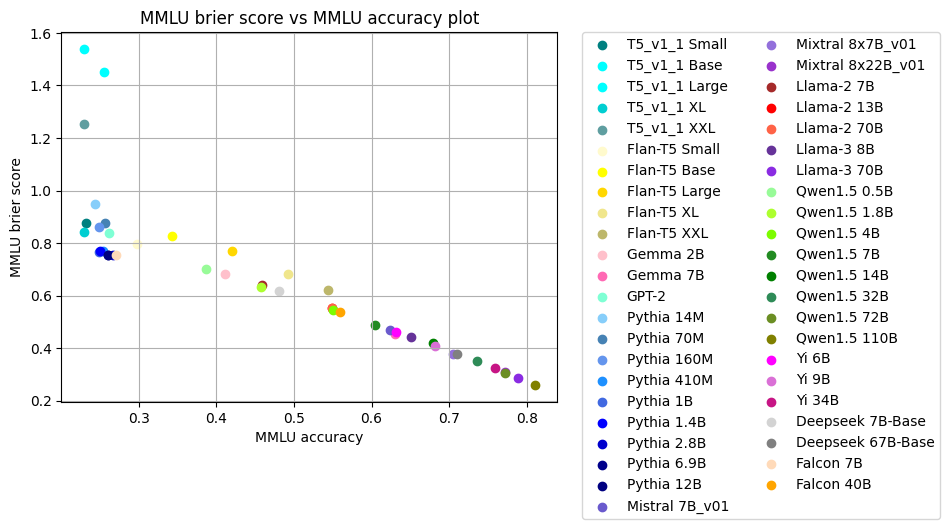

In [21]:
plot_x_y(all_models, "mmlu_acc", "mmlu_brier")

Gemma_1_1 2B-it has points x: NaN, y: NaN
Gemma_1_1 7B-it has points x: NaN, y: NaN
Mistral 7B Instruct_v02 has points x: NaN, y: NaN
Mixtral 8x7B Instruct_v01 has points x: NaN, y: NaN
Mixtral 8x22B Instruct_v01 has points x: NaN, y: NaN
Llama-2 7B-Chat has points x: NaN, y: NaN
Llama-2 13B-Chat has points x: NaN, y: NaN
Llama-2 70B-Chat has points x: NaN, y: NaN
Llama-3 8B-Instruct has points x: NaN, y: NaN
Llama-3 70B-Instruct has points x: NaN, y: NaN
Qwen1.5 0.5B-Chat has points x: NaN, y: NaN
Qwen1.5 1.8B-Chat has points x: NaN, y: NaN
Qwen1.5 4B-Chat has points x: NaN, y: NaN
Qwen1.5 7B-Chat has points x: NaN, y: NaN
Qwen1.5 14B-Chat has points x: NaN, y: NaN
Qwen1.5 32B-Chat has points x: NaN, y: NaN
Qwen1.5 72B-Chat has points x: NaN, y: NaN
Qwen1.5 110B-Chat has points x: NaN, y: NaN
Yi 6B-Chat has points x: NaN, y: NaN
Yi 34B-Chat has points x: NaN, y: NaN
Deepseek 7B-Chat has points x: NaN, y: NaN
Deepseek 67B-Chat has points x: NaN, y: NaN
Falcon 7B-Instruct has points x: 

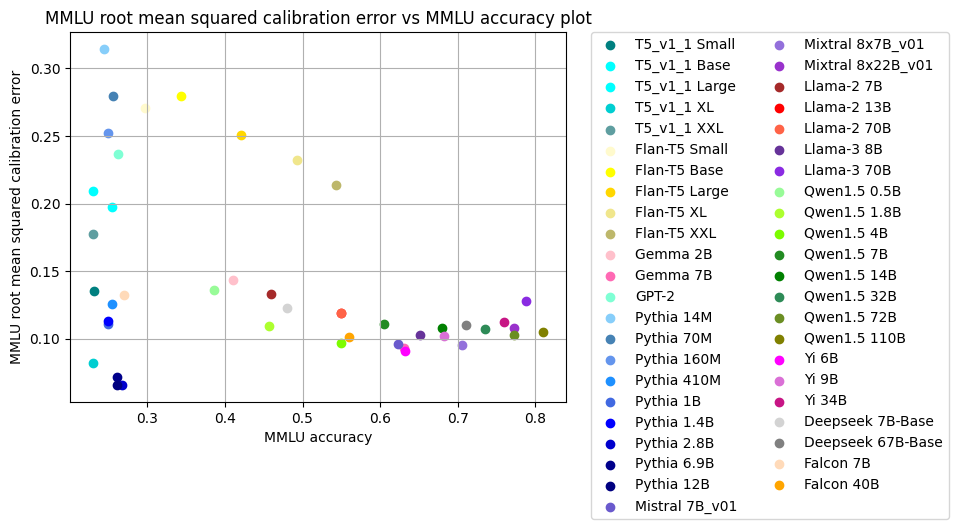

In [22]:
plot_x_y(all_models, "mmlu_acc", "mmlu_rmsce")

### Seeing results as Pandas DF

In [ ]:
mmlu_acc_values = [model[0] for model in acc_rmsce_models]
mmlu_brier_values = [model[1] for model in acc_brier_models]
mmlu_rmsce_values = [model[1] for model in acc_rmsce_models]
model_name = [model[2] for model in acc_rmsce_models]

df = pd.DataFrame({"gsm8k accuracy": acc_values, "gsm8k brier_score": brier_values, "gsm8k rmsce": rmsce_values}, index=model_name)
df.to_pickle('/data/ryan_k/safety_vs_capabilities/pickled_results/acc_brier_rmsce_results.pkl')

df

In [33]:
# create dataframe for all models gsm8k accuracy, brier_score, rmsce 
# save as pickle for Richard

acc_values = [model[0] for model in acc_rmsce_models]
brier_values = [model[1] for model in acc_brier_models]
rmsce_values = [model[1] for model in acc_rmsce_models]
model_name = [model[2] for model in acc_rmsce_models]

# Create DataFrame
df = pd.DataFrame({"gsm8k accuracy": acc_values, "gsm8k brier_score": brier_values, "gsm8k rmsce": rmsce_values}, index=model_name)
df.to_pickle('/data/ryan_k/safety_vs_capabilities/pickled_results/acc_brier_rmsce_results.pkl')

df


,MMLU accuracy,MMLU brier_score,MMLU rmsce
T5_v1_1 Small,0.2318758011679248,0.8752761293684251,0.13502654389694285
T5_v1_1 Base,0.25509186725537675,1.4504106908943244,0.19722047040836507
T5_v1_1 Large,0.22945449366187154,1.5386045911584412,0.20938977854275784
T5_v1_1 XL,0.22945449366187154,0.8433651931978258,0.08235747811316263
T5_v1_1 XXL,0.22945449366187154,1.2519179324763696,0.17745978883656166
Pythia 14M,0.244195983478137,0.957548898504293,0.2929259576533113
Pythia 70M,0.25630252100840334,0.8779677532340434,0.2797979596786977
Pythia 160M,0.24875373878364906,0.8611690652354206,0.2521134921144335
Pythia 410M,0.2545933627688364,0.7713938222834545,0.126053967242832
Pythia 1B,0.24910981341689217,0.7656234758100302,0.11114636904766408
